In [5]:
# Instala as bibliotecas necessárias
!pip install kagglehub pandas matplotlib seaborn

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download do dataset
path = kagglehub.dataset_download("atharvasoundankar/spotify-global-streaming-data-2024")
print("Caminho para os arquivos do dataset:", path)

# O caminho baixado é um diretório, precisamos encontrar o arquivo CSV dentro dele.
# Assumindo que o arquivo CSV principal está diretamente no diretório baixado.
# Você pode precisar ajustar o nome do arquivo se for diferente.
import os
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if len(csv_files) > 0:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print("Dataset carregado com sucesso!")
else:
    print("Nenhum arquivo CSV encontrado no caminho baixado.")
    df = pd.DataFrame() # Cria um DataFrame vazio para evitar erros

# Exibir as primeiras linhas e informações gerais do DataFrame
print("\nPrimeiras 5 linhas do dataset:")
print(df.head())
print("\nInformações gerais do dataset:")
df.info()

Caminho para os arquivos do dataset: /root/.cache/kagglehub/datasets/atharvasoundankar/spotify-global-streaming-data-2024/versions/2
Dataset carregado com sucesso!

Primeiras 5 linhas do dataset:
         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4       

In [6]:
print("\n--- 1. Os 5 Álbuns Mais Transmitidos e o Perfil de Suas Estatísticas ---")

# Certifique-se de que a coluna de streams está no formato numérico
df['Total Streams (Millions)'] = pd.to_numeric(df['Total Streams (Millions)'], errors='coerce').fillna(0)

# Agrupar por Álbum e somar os streams para encontrar os mais transmitidos
# Usaremos 'Album' como proxy para 'música' conforme sua solicitação.
top_albums = df.groupby('Album')['Total Streams (Millions)'].sum().nlargest(5).index

print(f"\nOs 5 álbuns mais transmitidos são: {list(top_albums)}")

# Filtrar o DataFrame para os top 5 álbuns e calcular as estatísticas
for album in top_albums:
    album_data = df[df['Album'] == album]['Total Streams (Millions)']
    print(f"\nEstatísticas de streaming para o álbum '{album}':")
    print(f"  Média de Streams: {album_data.mean():,.2f} milhões")
    print(f"  Mediana de Streams: {album_data.median():,.2f} milhões")
    print(f"  Desvio Padrão de Streams: {album_data.std():,.2f} milhões")
    print(f"  Mínimo de Streams: {album_data.min():,.2f} milhões")
    print(f"  Máximo de Streams: {album_data.max():,.2f} milhões")


--- 1. Os 5 Álbuns Mais Transmitidos e o Perfil de Suas Estatísticas ---

Os 5 álbuns mais transmitidos são: ['Proof', 'Future Nostalgia', 'Nadie Sabe Lo Que Va a Pasar Mañana', 'BORN PINK', 'Scarlet']

Estatísticas de streaming para o álbum 'Proof':
  Média de Streams: 2,824.99 milhões
  Mediana de Streams: 2,768.52 milhões
  Desvio Padrão de Streams: 1,536.54 milhões
  Mínimo de Streams: 351.09 milhões
  Máximo de Streams: 4,982.14 milhões

Estatísticas de streaming para o álbum 'Future Nostalgia':
  Média de Streams: 3,008.27 milhões
  Mediana de Streams: 3,186.63 milhões
  Desvio Padrão de Streams: 1,328.30 milhões
  Mínimo de Streams: 484.56 milhões
  Máximo de Streams: 4,845.19 milhões

Estatísticas de streaming para o álbum 'Nadie Sabe Lo Que Va a Pasar Mañana':
  Média de Streams: 2,655.40 milhões
  Mediana de Streams: 2,685.05 milhões
  Desvio Padrão de Streams: 1,313.94 milhões
  Mínimo de Streams: 374.09 milhões
  Máximo de Streams: 4,749.43 milhões

Estatísticas de streami


--- 2. Como se Distribuem os Pagamentos Mensais por País? ---

Estatísticas de 'Streams Last 30 Days (Millions)' por país:
           Country  Média (Milhões de Streams)  Mediana (Milhões de Streams)  \
0        Argentina                  104.971111                       108.510   
1        Australia                   96.536667                       102.460   
2           Brazil                  102.103667                        96.745   
3           Canada                  103.598800                       113.290   
4           France                  107.074348                        90.050   
5          Germany                   99.979500                       104.720   
6            India                   73.800455                        72.680   
7        Indonesia                   87.912000                        72.590   
8            Italy                   94.919118                        87.280   
9            Japan                  107.463478                        97.690

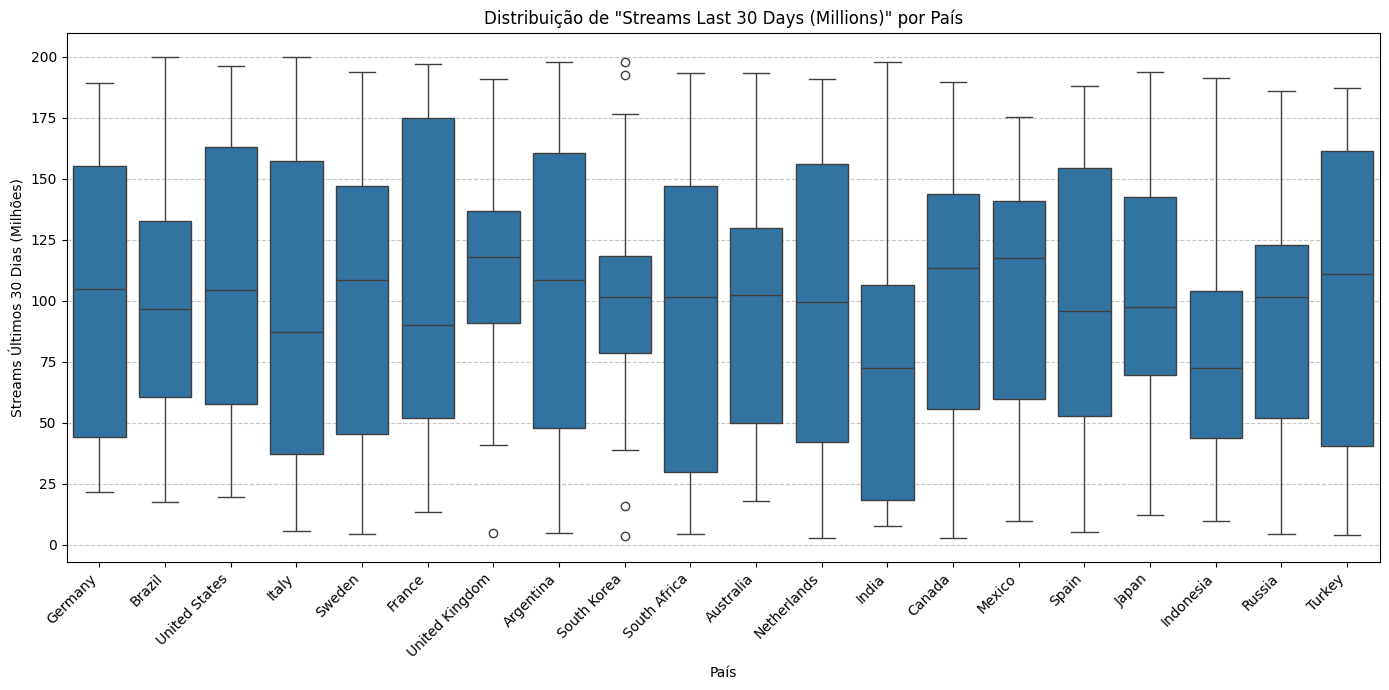

In [7]:
print("\n--- 2. Como se Distribuem os Pagamentos Mensais por País? ---")

# Certifique-se de que a coluna de pagamentos está no formato numérico
df['Streams Last 30 Days (Millions)'] = pd.to_numeric(df['Streams Last 30 Days (Millions)'], errors='coerce').fillna(0)

# Agrupar por país e calcular as estatísticas de 'Streams Last 30 Days (Millions)'
country_payments = df.groupby('Country')['Streams Last 30 Days (Millions)'].agg(['mean', 'median', 'std']).reset_index()
country_payments.columns = ['Country', 'Média (Milhões de Streams)', 'Mediana (Milhões de Streams)', 'Desvio Padrão (Milhões de Streams)']

print("\nEstatísticas de 'Streams Last 30 Days (Millions)' por país:")
print(country_payments)

# Visualização: Boxplot dos 'Streams Last 30 Days (Millions)' por país
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='Streams Last 30 Days (Millions)', data=df)
plt.title('Distribuição de "Streams Last 30 Days (Millions)" por País')
plt.xlabel('País')
plt.ylabel('Streams Últimos 30 Dias (Milhões)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
print("\n--- 3. Os 5 Artistas Mais Populares em Termos de Número Médio de Confirmação por Álbum ---")

# Calcular a média e o desvio padrão de 'Streams Last 30 Days (Millions)' para cada artista
# As entradas para cada artista são tratadas como suas "músicas/álbuns" para esta agregação.
artist_performance_recalculated = df.groupby('Artist')['Streams Last 30 Days (Millions)'].agg(['mean', 'std']).reset_index()
artist_performance_recalculated.columns = ['Artist', 'Média de Streams por Entrada (Milhões)', 'Desvio Padrão de Streams por Entrada (Milhões)']

# Identificar os 5 artistas com maior média de streams por entrada
top_artists_recalculated = artist_performance_recalculated.nlargest(5, 'Média de Streams por Entrada (Milhões)')

print("\nOs 5 artistas mais populares (média e desvio padrão de 'Streams Last 30 Days (Millions)' por todas as suas entradas):")
print(top_artists_recalculated)


--- 3. Os 5 Artistas Mais Populares em Termos de Número Médio de Confirmação por Álbum ---

Os 5 artistas mais populares (média e desvio padrão de 'Streams Last 30 Days (Millions)' por todas as suas entradas):
            Artist  Média de Streams por Entrada (Milhões)  \
7         Dua Lipa                              119.520541   
12             SZA                              110.667000   
10  Olivia Rodrigo                              104.082059   
6            Drake                              103.382258   
4    Billie Eilish                              102.852903   

    Desvio Padrão de Streams por Entrada (Milhões)  
7                                        47.974877  
12                                       62.521383  
10                                       56.214921  
6                                        60.092495  
4                                        61.013159  



--- 4. Como Varia a Duração das Músicas entre Categorias de Popularidade? (Versão Final) ---

Variação da duração das músicas (Avg Stream Duration) entre categorias de popularidade:
  Grupo de Popularidade  Média de Duração (Min)  Mediana de Duração (Min)  \
0                 Baixa                3.552335                     3.610   
1                 Média                3.452229                     3.455   
2                  Alta                3.556946                     3.640   

   Desvio Padrão de Duração (Min)  
0                        0.536584  
1                        0.574807  
2                        0.598511  


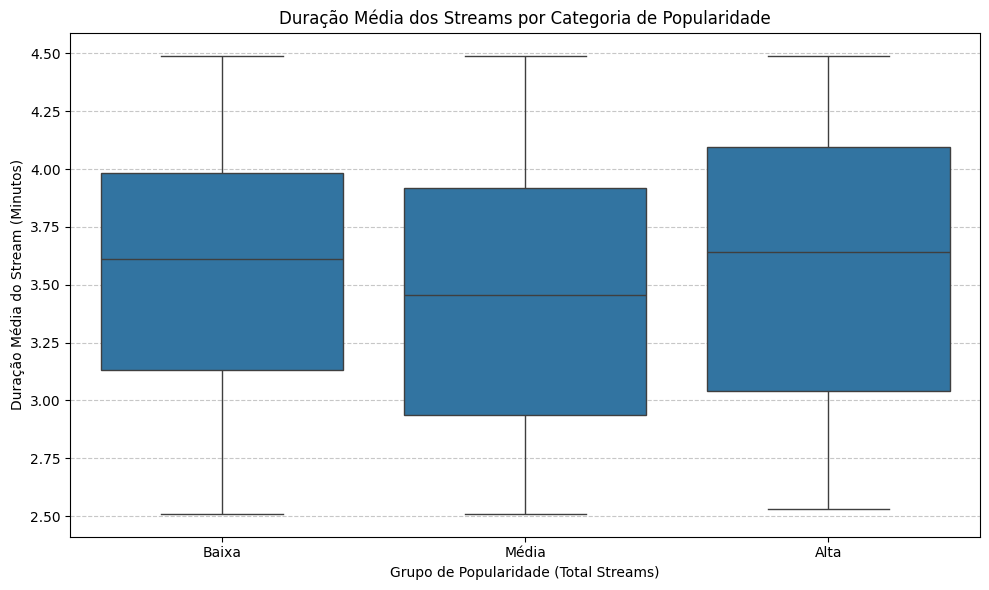

In [12]:
print("\n--- 4. Como Varia a Duração das Músicas entre Categorias de Popularidade? (Versão Final) ---")

# A coluna de duração é 'Avg Stream Duration (Min)'
duration_col = 'Avg Stream Duration (Min)'

# Criar os grupos de popularidade (tercis) com base em 'Total Streams (Millions)'
# Esta parte do código cria a coluna 'Popularity Group'
df['Total Streams (Millions)'] = pd.to_numeric(df['Total Streams (Millions)'], errors='coerce').fillna(0)

# Verificação para qcut, caso haja poucos valores únicos, para evitar erro
if df['Total Streams (Millions)'].nunique() >= 3:
    df['Popularity Group'] = pd.qcut(df['Total Streams (Millions)'], q=3, labels=['Baixa', 'Média', 'Alta'])
else:
    print("Não há variedade suficiente em 'Total Streams (Millions)' para criar 3 grupos de popularidade. Esta análise de grupo pode não ser significativa.")
    df['Popularity Group'] = 'N/A' # Define um valor padrão caso não possa criar os grupos

# Procede com a análise apenas se os grupos foram criados com sucesso
if not df['Popularity Group'].eq('N/A').all():
    # Calcular as estatísticas de duração para cada grupo de popularidade
    # ADIÇÃO: 'observed=True' para silenciar o FutureWarning
    duration_by_popularity = df.groupby('Popularity Group', observed=True)[duration_col].agg(['mean', 'median', 'std']).reset_index()
    duration_by_popularity.columns = ['Grupo de Popularidade', 'Média de Duração (Min)', 'Mediana de Duração (Min)', 'Desvio Padrão de Duração (Min)']

    print("\nVariação da duração das músicas (Avg Stream Duration) entre categorias de popularidade:")
    print(duration_by_popularity)

    # Visualização: Boxplot da duração por grupo de popularidade
    plt.figure(figsize=(10, 6))
    # Garantir a ordem das categorias no boxplot
    sns.boxplot(x='Popularity Group', y=duration_col, data=df, order=['Baixa', 'Média', 'Alta'])
    plt.title('Duração Média dos Streams por Categoria de Popularidade')
    plt.xlabel('Grupo de Popularidade (Total Streams)')
    plt.ylabel('Duração Média do Stream (Minutos)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Análise de variação da duração por popularidade não executada completamente devido à falta de dados para criar grupos ou dados insuficientes.")